In [1]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np
import os
from PyFVCOM.read import MFileReader,ncwrite
from PyFVCOM.read import ncread
import pickle
from datetime import datetime
from cmocean import cm
import matplotlib.pyplot as plt

In [2]:
with open('zhouwei.pkl','rb') as f:
    index = pickle.load(f)

In [3]:
datapath = '/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/'
files = datapath + 'cockburn_0058.nc'
#files = os.path.join(os.getcwd()[:-11],'data', 'cockburn_0001.nc')
print(files)
dims = {'node':[int(x) for x in index['node']],'nele':[int(x) for x in index['nele']]}
varlist = ['lon','lat','lonc','latc','zeta','temp','u']

fvcom = MFileReader(files, variables=varlist,dims = dims)

/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0058.nc
lon does not contain a time dimension. (/public/home/gaoguandong/xrsh/bin/anaconda3/envs/IOOS/lib/python3.7/site-packages/PyFVCOM/read.py:1228)
lat does not contain a time dimension. (/public/home/gaoguandong/xrsh/bin/anaconda3/envs/IOOS/lib/python3.7/site-packages/PyFVCOM/read.py:1228)
lonc does not contain a time dimension. (/public/home/gaoguandong/xrsh/bin/anaconda3/envs/IOOS/lib/python3.7/site-packages/PyFVCOM/read.py:1228)
latc does not contain a time dimension. (/public/home/gaoguandong/xrsh/bin/anaconda3/envs/IOOS/lib/python3.7/site-packages/PyFVCOM/read.py:1228)


In [4]:
fvcom.data.u.shape

(180, 20, 114)

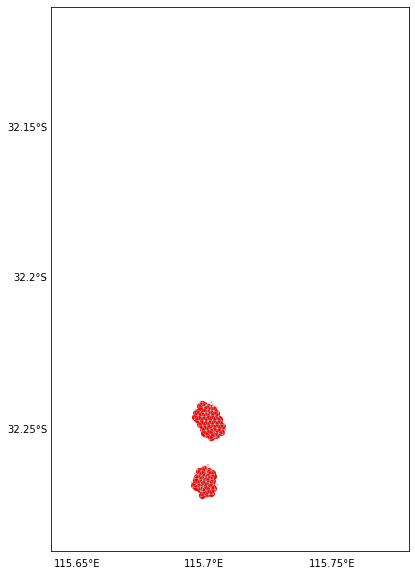

In [5]:
llcrnrlon=115.64
urcrnrlon=115.78
#llcrnrlat=-32.28
#urcrnrlat=-32.23
llcrnrlat=-32.29
urcrnrlat=-32.11
def make_map(ax=None,llcrnrlon=-49, urcrnrlon=-39, llcrnrlat=-30, urcrnrlat=-21,lat_0 = -80, lon_0 = 115,
             projection='merc', resolution='h', figsize=(6, 6), inset=True, epsg = 2933):
    from mpl_toolkits.basemap import Basemap
    m = Basemap(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon,
                llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,
                projection = projection, resolution=resolution, lat_0 = lat_0,lon_0 = lon_0)
    m.drawstates()
    #m.drawcoastlines()
    #m.fillcontinents(color='0.85',zorder = 0)
    meridians = np.arange(115.65, urcrnrlon + 2, 0.05)
    parallels = np.arange(-32.3, urcrnrlat + 2, 0.05)
    m.drawparallels(parallels, linewidth=0, labels=[1, 0, 0, 0])
    m.drawmeridians(meridians, linewidth=0, labels=[0, 0, 0, 1])
    m.llcrnrlon = llcrnrlon
    m.urcrnrlon = urcrnrlon
    m.llcrnrlat = llcrnrlat
    m.urcrnrlat = urcrnrlat
    
    m.ax = ax
    return m

fig = plt.figure(figsize = (10,10) )
ax = fig.add_subplot(1,1,1)
m = make_map(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, figsize=(20, 10)
             ,ax =ax,epsg=32750, lat_0 = -80, lon_0 = 110)
triangles = fvcom.grid.nv.transpose() - 1
[xx,yy] = m(fvcom.grid.lon,fvcom.grid.lat)
m.ax.triplot(xx, yy, triangles, color='0.7', linewidth=0.5, zorder=10)
[xxc,yyc] = m(fvcom.grid.lonc,fvcom.grid.latc)
m.ax.scatter(xxc,yyc,facecolor = 'red')

In [6]:
#del fvcom

for i in np.arange(1,59):
    print(datetime.now())
    print(str(i).zfill(4))
    files = datapath + 'cockburn_'+str(i).zfill(4)+'.nc'
    dims = {'node':[int(x) for x in index['node']],'nele':[int(x) for x in index['nele']]}
   # dims = {'siglay':1}#{'node':x,'nele':xc}#,'time':[x for x in np.arange(timemin,timemax)]}
    varlist = ['temp','u','v','zeta']

    print(files)
    if i==1:
        fvcom= MFileReader(files, variables=varlist, dims=dims)
    else:
        fvcom= MFileReader(files, variables=varlist, dims=dims) >> fvcom    
        
print(datetime.now())


fvcom.ds = []
output = open('zhouwei_fvcom.pkl', 'wb')
pickle.dump(fvcom, output, protocol = 4)

output.close()

2019-12-04 17:30:41.475245
0001
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0001.nc
2019-12-04 17:31:20.154406
0002
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0002.nc
2019-12-04 17:32:07.271220
0003
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0003.nc
2019-12-04 17:32:55.444571
0004
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0004.nc
2019-12-04 17:33:58.712277
0005
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0005.nc
2019-12-04 17:37:04.537388
0006
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0006.nc
2019-12-04 17:40:12.628425
0007
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0007.nc
2019-12-04 17:43:56.996117
0008
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0008.nc
2019-12-04 17:47:04.565533
0009
/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0009.nc
2019-12-04 17:49:59.997296
0010
/public/home/gaoguandong/xrsh/work/wind2/